# Usage

You can just Run All cells and get result as "concentration_prediction_model.bson", but the result could be not optimal. The training process is splitted on two parts. The first training has gradually decreasing *learning rate*.  The second part is training with the lowest possible *learning rate* to get lowest values of loss function.

# Options 
The current training use data only for systems with concentrations 20, 40, 60, 100. It leads to situation when prediction for values out of this range (for example 10) is quiet bad. For getting the best possible result you need to use more data and remember about extrapolation problem.

In [30]:
using Flux
using Flux: params
using Plots
using BSON: @save, @load
include("src/parsing.jl")

Main.parsing

In [31]:
rdf10 = parsing.read_rdf_vector("rdf_data/10CH3OH-CG.rdf");
rdf20 = parsing.read_rdf_vector("rdf_data/20CH3OH-CG.rdf");
rdf30 = parsing.read_rdf_vector("rdf_data/30CH3OH-CG.rdf");
rdf40 = parsing.read_rdf_vector("rdf_data/40CH3OH-CG.rdf");
rdf50 = parsing.read_rdf_vector("rdf_data/50CH3OH-CG.rdf");
rdf60 = parsing.read_rdf_vector("rdf_data/60CH3OH-CG.rdf");
rdf70 = parsing.read_rdf_vector("rdf_data/70CH3OH-CG.rdf");
rdf80 = parsing.read_rdf_vector("rdf_data/80CH3OH-CG.rdf");
rdf90 = parsing.read_rdf_vector("rdf_data/90CH3OH-CG.rdf");
rdf100 = parsing.read_rdf_vector("rdf_data/100CH3OH-CG.rdf");

In [32]:
# Define your TRAINING dataset
X = [100, 60, 40, 20]               # Density
Y = [rdf100, rdf60, rdf40, rdf20]   # Corresponding RDF data with the same order as X

# Combine the date to one training data frame
data = [([X[i]], Y[i]) for i in 1:length(X)];

In [33]:
# Define the model
model = Chain(
    Dense(1, 64, relu),  # Input layer with 1 input
    Dense(64, 128, tanh),  # Hidden layer
    Dense(128, 300)       # Output layer with 300 outputs
)

# Define the loss function and optimizer
loss(x, y) = Flux.mse(model(x), y)


loss (generic function with 1 method)

# Training

In [34]:
for i in 1:6
    lr = 0.001 / 10^(i - 1)
    println("Learning rate: $(lr)")
    optimizer = Adam(lr)

    epochs = 10000
    for epoch in 1:epochs
        for (x, y) in data
            gs = gradient(() -> loss(x, y), params(model))
            Flux.Optimise.update!(optimizer, params(model), gs)
        end
        if (epoch % 1000 == 0)
            println("Epoch $epoch, Loss: $(loss(data[1][1], data[1][2]))")
        end
    end
end


Learning rate: 0.001


Epoch 1000, Loss: 0.00050206477


Epoch 2000, Loss: 0.0004566399


Epoch 3000, Loss: 0.00011484119


Epoch 4000, Loss: 7.563205e-5


Epoch 5000, Loss: 0.00020876554


Epoch 6000, Loss: 0.0001017446


Epoch 7000, Loss: 0.00014828936


Epoch 8000, Loss: 1.7629138e-5


Epoch 9000, Loss: 6.1908014e-7


Epoch 10000, Loss: 0.00014962148
Learning rate: 0.0001


Epoch 1000, Loss: 9.372156e-7


Epoch 2000, Loss: 8.1407865e-7


Epoch 3000, Loss: 2.2764002e-6


Epoch 4000, Loss: 1.4651165e-7


Epoch 5000, Loss: 6.700615e-7


Epoch 6000, Loss: 3.045543e-6


Epoch 7000, Loss: 1.3047869e-6


Epoch 8000, Loss: 4.6301696e-7


Epoch 9000, Loss: 4.2271713e-6


Epoch 10000, Loss: 1.492952e-6
Learning rate: 1.0e-5


Epoch 1000, Loss: 2.1112292e-8


Epoch 2000, Loss: 8.863372e-9


Epoch 3000, Loss: 4.824576e-9


Epoch 4000, Loss: 2.3093792e-8


Epoch 5000, Loss: 9.466409e-9


Epoch 6000, Loss: 2.3934406e-9


Epoch 7000, Loss: 2.1116012e-8


Epoch 8000, Loss: 8.469694e-9


Epoch 9000, Loss: 8.213484e-9


Epoch 10000, Loss: 3.2862333e-9
Learning rate: 1.0e-6


Epoch 1000, Loss: 1.0504557e-10


Epoch 2000, Loss: 1.165835e-10


Epoch 3000, Loss: 3.547687e-11


Epoch 4000, Loss: 9.7353355e-11


Epoch 5000, Loss: 1.2094546e-10


Epoch 6000, Loss: 9.946227e-11


Epoch 7000, Loss: 8.842579e-11


Epoch 8000, Loss: 2.7380054e-10


Epoch 9000, Loss: 7.0396994e-11


Epoch 10000, Loss: 3.714882e-11
Learning rate: 1.0e-7


Epoch 1000, Loss: 6.65572e-14


Epoch 2000, Loss: 5.865026e-14


Epoch 3000, Loss: 6.1654336e-14


Epoch 4000, Loss: 4.860327e-14


Epoch 5000, Loss: 5.96613e-14


Epoch 6000, Loss: 1.8176948e-13


Epoch 7000, Loss: 5.6085287e-14


Epoch 8000, Loss: 3.755081e-14


Epoch 9000, Loss: 7.1870624e-14


Epoch 10000, Loss: 3.9220248e-14
Learning rate: 1.0e-8


Epoch 1000, Loss: 1.1983938e-14


Epoch 2000, Loss: 1.3201432e-14


Epoch 3000, Loss: 1.1234629e-14


Epoch 4000, Loss: 1.03999535e-14


Epoch 5000, Loss: 1.0049181e-14


Epoch 6000, Loss: 1.0705575e-14


Epoch 7000, Loss: 1.0862119e-14


Epoch 8000, Loss: 1.05250925e-14


Epoch 9000, Loss: 1.3076736e-14


Epoch 10000, Loss: 1.050535e-14


In [35]:
lr = 1.0e-8
println("Learning rate: $(lr)")
optimizer = Adam(lr)

epochs = 20000
for epoch in 1:epochs
    for (x, y) in data
        gs = gradient(() -> loss(x, y), params(model))
        Flux.Optimise.update!(optimizer, params(model), gs)
    end
    if (epoch % 1000 == 0)
        println("Epoch $epoch, Loss: $(loss(data[1][1], data[1][2]))")
    end
end

Learning rate: 1.0e-8


Epoch 1000, Loss: 1.10086755e-14


Epoch 2000, Loss: 1.0939262e-14


Epoch 3000, Loss: 9.42741e-15


Epoch 4000, Loss: 8.834799e-15


Epoch 5000, Loss: 1.0644026e-14


Epoch 6000, Loss: 1.2162304e-14


Epoch 7000, Loss: 7.69035e-15


Epoch 8000, Loss: 1.21428695e-14


Epoch 9000, Loss: 8.977589e-15


Epoch 10000, Loss: 8.775358e-15


Epoch 11000, Loss: 8.205849e-15


Epoch 12000, Loss: 7.617512e-15


Epoch 13000, Loss: 9.101477e-15


Epoch 14000, Loss: 9.774668e-15


Epoch 15000, Loss: 9.783922e-15


Epoch 16000, Loss: 1.0559911e-14


Epoch 17000, Loss: 1.1919285e-14


Epoch 18000, Loss: 1.07443e-14


Epoch 19000, Loss: 9.2808926e-15


Epoch 20000, Loss: 9.383755e-15


# Plots on trained data sets

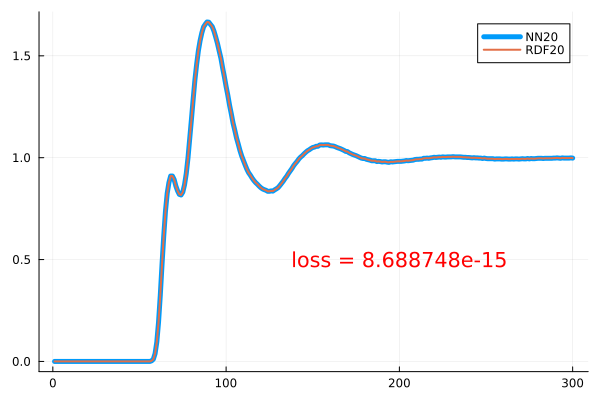

In [36]:
plot(model([20]), lw=5, label="NN20")
plot!(rdf20, lw=2, label="RDF20")
annotate!(200, 0.5, "loss = $(loss([20], rdf20))", :red)

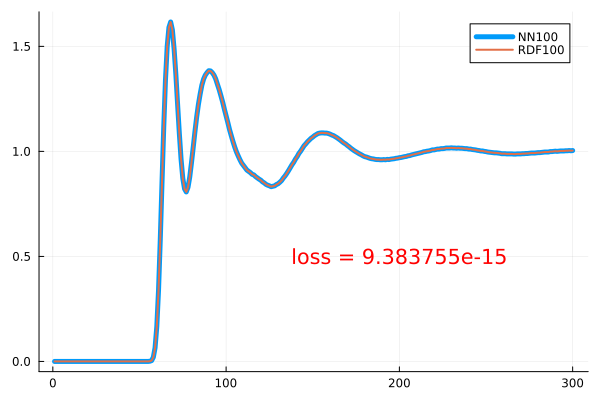

In [37]:
plot(model([100]), lw=5, label="NN100")
plot!(rdf100, lw=2, label="RDF100")
annotate!(200, 0.5, "loss = $(loss([100], rdf100))", :red)

# Plots on testing data sets

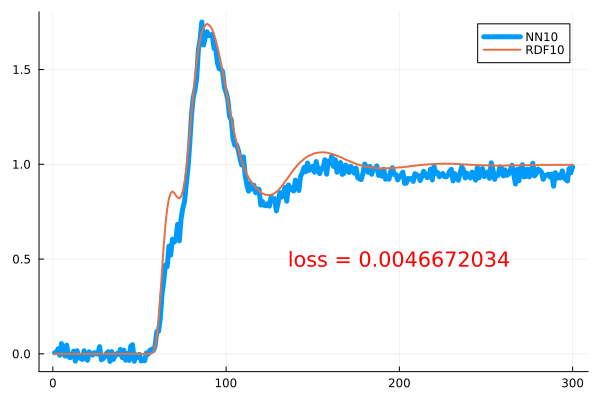

In [38]:
plot(model([10]), lw=5, label="NN10")
plot!(rdf10, lw=2, label="RDF10")
annotate!(200, 0.5, "loss = $(loss([10], rdf10))", :red)

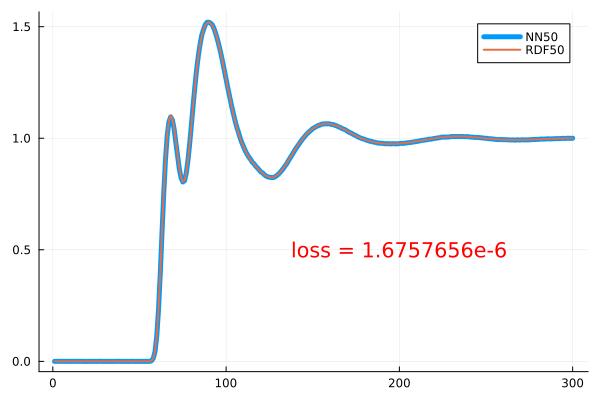

In [39]:
plot(model([50]), lw=5, label="NN50")
plot!(rdf50, lw=2, label="RDF50")
annotate!(200, 0.5, "loss = $(loss([50], rdf50))", :red)

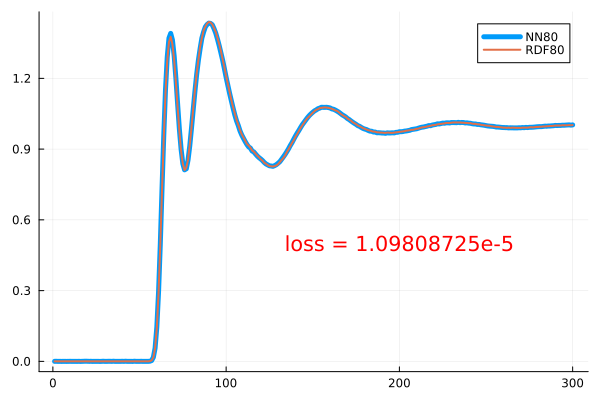

In [40]:
plot(model([80]), lw=5, label="NN80")
plot!(rdf80, lw=2, label="RDF80")
annotate!(200, 0.5, "loss = $(loss([80], rdf80))", :red)

# Smile-plot

In [41]:
losses = [loss([10], rdf10), loss([20], rdf20), loss([30], rdf30),
    loss([40], rdf40), loss([50], rdf50), loss([60], rdf60), loss([70], rdf70),
    loss([80], rdf80), loss([90], rdf90), loss([100], rdf100)]

10-element Vector{Float32}:
 0.0046672034
 8.688748f-15
 1.5087929f-5
 1.6363938f-14
 1.6757656f-6
 2.1371127f-14
 5.787062f-6
 1.09808725f-5
 7.166952f-6
 9.383755f-15

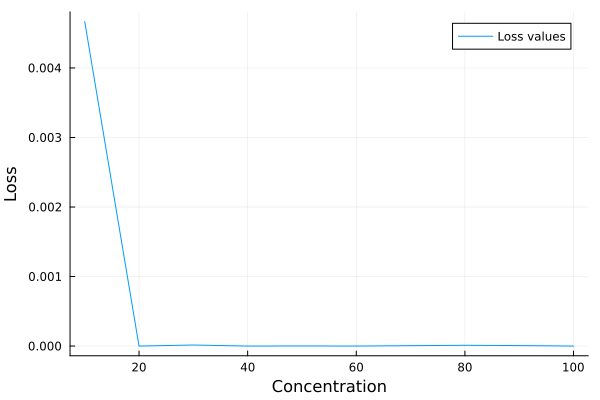

In [42]:
losses_x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plot(losses_x, losses, label="Loss values", xlabel="Concentration", ylabel="Loss")

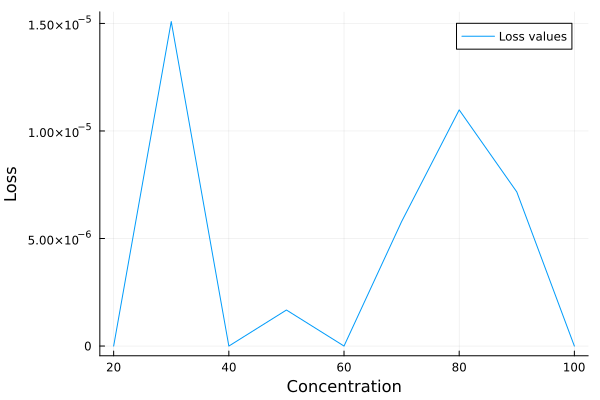

In [43]:
plot(losses_x[2:end], losses[2:end], label="Loss values", xlabel="Concentration", ylabel="Loss")

In [44]:
@save "concetration_prediction_model.bson" model